In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
data = pd.read_csv('static/Adidas US Sales Datasets.csv')
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/20,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/20,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/20,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/21,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/21,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/21,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/21,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [75]:
def data_cleaning(df):
    data = df.copy()
    data['Invoice Date'] = pd.to_datetime(data['Invoice Date'], format='%m/%d/%y')
    data['Year'] = data['Invoice Date'].dt.year
    data['Month'] = data['Invoice Date'].dt.month
    data['Operating Profit'] = data['Operating Profit'].str.replace('$', '').str.replace(',', '')
    data['Operating Profit'] = data['Operating Profit'].astype(int)
    data['operating_profit'] = data['Operating Profit']
    return data

In [46]:
cleaned = data_cleaning(data)
cleaned

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000",300000,50%,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000",150000,30%,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000",140000,35%,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500",133875,35%,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000",162000,30%,In-store,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",896,28%,Outlet,2021,1
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305",1378,32%,Outlet,2021,1
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544",2791,37%,Outlet,2021,2
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940",1235,42%,Outlet,2021,2


In [47]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int32         
 14  Month             9648 n

In [48]:
cleaned_2020 = cleaned[cleaned['Year'] == 2020]
cleaned_2021 = cleaned[cleaned['Year'] == 2021]

In [72]:
cleaned_2020.shape

(1302, 15)

In [73]:
cleaned_2021.shape

(8346, 15)

In [71]:
cleaned['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Nebraska', 'Alabama', 'Maine', 'Alaska',
       'Hawaii', 'Wyoming', 'Virginia', 'Michigan', 'Missouri', 'Utah',
       'Oregon', 'Louisiana', 'Idaho', 'Arizona', 'New Mexico', 'Georgia',
       'South Carolina', 'North Carolina', 'Ohio', 'Kentucky',
       'Mississippi', 'Arkansas', 'Oklahoma', 'Kansas', 'South Dakota',
       'North Dakota', 'Iowa', 'Wisconsin', 'Indiana', 'West Virginia',
       'Maryland', 'Delaware', 'New Jersey', 'Connecticut',
       'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire'],
      dtype=object)

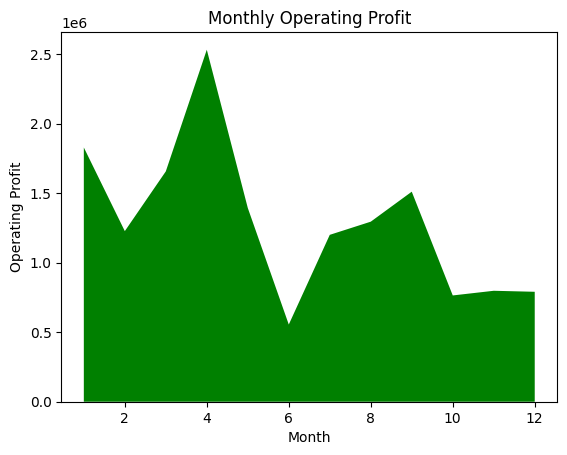

In [63]:
mens_street_footwear_data = cleaned_2020[cleaned_2020['Product'] == "Men's Street Footwear"]
monthly_profit = mens_street_footwear_data.groupby('Month')['Operating Profit'].sum()

plt.stackplot(monthly_profit.index, monthly_profit.values, colors=['green'])

plt.xlabel('Month')
plt.ylabel('Operating Profit')
plt.title("Monthly Operating Profit")

plt.show()

In [65]:
mens_apparel_data = cleaned_2020[cleaned_2020['Product'] == "Men's Apparel"]

combined_data = pd.concat([mens_street_footwear_data, mens_apparel_data])

monthly_profit = combined_data.groupby(['Month', 'Product'])['Operating Profit'].sum().reset_index()

fig = px.line(monthly_profit, x='Month', y='Operating Profit', color='Product',
              title="Monthly Operating Profit for Men's Street Footwear and Men's Apparel",
              labels={'Month': 'Month', 'Operating Profit': 'Operating Profit'})

fig.show()

In [66]:
fig = px.area(monthly_profit, x='Month', y='Operating Profit', color='Product',
              title="Monthly Operating Profit for Men's Street Footwear and Men's Apparel",
              labels={'Month': 'Month', 'Operating Profit': 'Operating Profit'},
              line_group='Product')

fig.show()

In [76]:
cleaned.to_csv('cleaned.csv', index=False)